# Tabla de contenidos



* [1. Introducción](#1)

* [2. Understanding](#2)
  * [2.1 ¿En qué consiste el proyecto?](#2.1)
  * [2.2 Plan preliminar del proyecto](#2.2)
  
 

* [3. Data understanding](#3)
  * [3.1 Diccionario de datos ](#3.1)
  * [3.2 Distribución de la variable Visitor](#3.2)
  * [3.3 Diferencias entre tiempo de sesión entre visitantes y no visitantes](#3.3)
  * [3.4 Heatmaps de correlacion](#3.4)


* [ 4. Data Preparation](#4)
  


  

In [87]:
#cargamo las librerias
 # numpy and pandas for data manipulation
import numpy as np
import pandas as pd


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


import datetime

<a id="1"></a>

# 1. Introducción
<p>El proceso estándar entre industrias para la minería de datos, conocido como <b> CRISP-DM </b> (Cross-industry standard process for data mining), es un modelo de proceso estándar abierto que describe enfoques comunes utilizados por expertos en minería de datos o ciencia de datos. Es el modelo de análisis más utilizado en la industria.</p>

 <p> En escencia, <b> CRISP DM </b> es un set de buenas practicas para ayudar a planear, organizar y ejecutar projectos de data mining or data analytics  </p>
 
 <p>El análisis presentado a continuación se realizó siguiendo las líneas de <b> CRISP DM</b> </p>


<center> <p><img class = "center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/319px-CRISP-DM_Process_Diagram.png" width="400" height="400 alt="CRISP-DM"></p> </center>

<a id="2"></a>

# 2. Business Understanding

Antes de ejercutar algun analisis, o tirar alguna linea de codigo lo primero es entender el problema en si. 

En la primera fase ( Business Understanding) se identifica los siguientes puntos:

- Identificar los requerimentos
- Evaluar la situación
- Producir un plan preeliminar de proyecto





<a id="2.1"></a>

## 2.1 ¿En qué consiste el proyecto? 

*   Utilizando la base llamada "e" realizar un análisis descriptivo y exploratorio de la base de datos, encuentra y grafica cómo se distribuyen los visitantes, horas, días, etc... El análisis es libre, ¡sorpréndenos!

*   Algo muy importante del dataset "e" es encontrar qué es lo que hace a un visitante y con ese hallazgo analizar el dataset "v"

* El dataset "v" es idéntico al "e" SOLO EN COLUMNAS, los datos en las filas son
diferentes y fungen como datos completamente nuevos para el modelo. En
consecuencia, “v” no tiene etiquetado si el usuario es visitante o no. 


<a id="2.2"></a>

## 2.2 Plan preliminar del proyecto

La descripcion del proyecto nos indica que estamos contra un problema de clasificacion , en especifico un problema de clasificacion de la columna o variable **visitantes**, el plan preeliminar será hacer un EDA (Exploratory Data Analysis) simple, teniendo en cuenta que la columna a predecir es **visitantes**. 

<a id="3"></a>

# 3. Data Understanding

Una vez identificada los requerimentos y elavorado el plan preliminar procedemos a la description y exploracion de los datos, usalmente dentro del **CRSIP-DM** se abordan las siguientes directivas (muy similares a las que se tomaron en cuenta) :

- Reunir datos
- Descripción de los datos
- Exploración de los datos
- Verificar la calidad de los datos


<a id="3.1"></a>

## 3.1 Diccionario de datos

Dos sets de datos **"e"** y **"v"** fueron captados con algunos sensores de tecnología de tracking de la posición de celulares mediante señales de wifi. Los análisis que te pedimos nos ayudes a
realizar son los siguientes:



*   **Ambas bases cuentan con las siguientes variables:**


    * device_mac
    * branch_office
    * month_tz
    * day_tz
    * day_of_week_tz
    * hour_tz
    * visitor
    * tiempodeses



*   *device_mac*: se refiere al identificador único de un celular, cada célula asumimos es una persona 

*   *branch_office*: es la sucursal de cliente

* *visitor*: es una variable indicadora donde **true** significa que es visitante del lugar y **false** que no

* *tiempodeses*: es el tiempo de la sesión (en segundos)



In [88]:
#read dataset into pandas dataframe
e_df = pd.read_csv("klustera/e.csv")
v_df = pd.read_csv("klustera/v.csv")
#see the fisrt 10 rows of each dataset
print(e_df.head())
print("_____________________________________________________")

print(v_df.head())
#drop the unnamed (index column)
e_df.drop(columns=e_df.columns[0], 
        axis=1, 
        inplace=True)
v_df.drop(columns=v_df.columns[0], 
        axis=1, 
        inplace=True)

   Unnamed: 0         device_mac  branch_office  month_tz  day_tz  \
0           1  00:00:00:6a:17:ce              1        11       2   
1           2  00:00:00:6a:17:ce              1        11       2   
2           3  00:00:00:6a:78:ae              1        10      30   
3           4  00:00:02:fa:9c:12              1        11      13   
4           5  00:00:08:7d:e2:58              3        11       4   

  day_of_week_tz  hour_tz  visitor  tiempodeses  
0      Wednesday        0     True         2676  
1      Wednesday        1     True         2676  
2         Sunday       20    False            0  
3         Sunday       12     True         2272  
4         Friday       19    False            0  
_____________________________________________________
   Unnamed: 0         device_mac  branch_office  month_tz  day_tz  \
0           1  a8:81:95:56:31:3c              1        11      17   
1           2  44:6e:e5:1b:68:81              3        11       3   
2           3  0c:b3:19:

In [89]:
#exploremos mas a fondo cada dataframe:
print("e_df:")
print(e_df.info())
print("_________________________________________________")
print("v_df:")
print(v_df.info())

e_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249556 entries, 0 to 249555
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   device_mac      249556 non-null  object
 1   branch_office   249556 non-null  int64 
 2   month_tz        249556 non-null  int64 
 3   day_tz          249556 non-null  int64 
 4   day_of_week_tz  249556 non-null  object
 5   hour_tz         249556 non-null  int64 
 6   visitor         249556 non-null  bool  
 7   tiempodeses     249556 non-null  int64 
dtypes: bool(1), int64(5), object(2)
memory usage: 13.6+ MB
None
_________________________________________________
v_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   device_mac      90000 non-null  object
 1   branch_office   90000 non-null  int64 
 2   month_tz        90000 no

- la info mas detallada nos dice que e_df es un dataset de aprox 250K observaciones y 8 variables (249K x 9)
- y que v_df (90K x 7)   
- el detalle nos indica que no hay datos faltantes en ninguno de los dos dataset :)
<a id="3.2"></a>

## 3.2 Distribución de la variable Visitor

 con esta informacion procedemos a verificar la calidad de los dataframes y describir mas a fondo la distribucion de la feature **visitor**

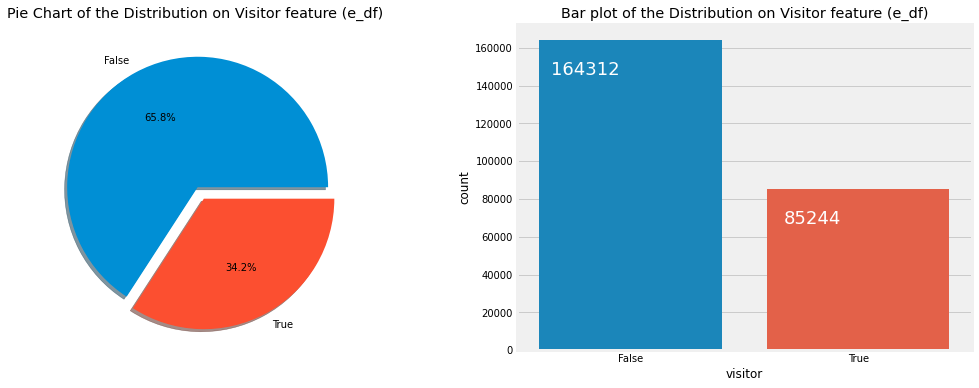

In [90]:
#pie plot de visitor
f,ax=plt.subplots(1,2,figsize=(16,6))
e_df['visitor'].value_counts().plot.pie(explode=[0,0.1],  autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Pie Chart of the Distribution on Visitor feature (e_df) ')
ax[0].set_ylabel('')

# histogram de visitor
sns.countplot('visitor', data=e_df,ax=ax[1])
ax[1].set_title('Bar plot of the Distribution on Visitor feature (e_df)')
#trick for display the count pretty
for p in ax[1].patches:
    ax[1].annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()


una vez investigado sobre la distribucion de la variable principal, dare un vistazo a otra variable importante, la cual es device_mac

In [91]:
macs_dups_df = e_df.pivot_table(columns=['device_mac','visitor'], aggfunc='size')
# promedio en el que se repite un device_mac
print ("promedio en el que se repite device_mac:",np.mean(macs_dups_df))
print("__________________________________________________")
print (macs_dups_df.sort_values(ascending=False))


promedio en el que se repite device_mac: 1.8292005365428172
__________________________________________________
device_mac         visitor
00:20:00:94:8e:d3  True       489
64:66:b3:ba:6d:fc  True       454
68:b5:99:8d:05:07  True       444
lon                True       444
00:23:68:b2:58:a7  True       415
                             ... 
80:6c:1b:1d:6e:b6  False        1
24:f0:94:84:38:c3  False        1
80:6c:1b:1d:17:3b  False        1
80:6c:1b:1d:14:b6  True         1
84:38:38:3b:82:c3  False        1
Length: 136429, dtype: int64


por los anteriores calculos podemos observar que:

- en promedio se repiten 1.8 veces cada device_mac
- la device_mac que mas es de un visitante y se repite 489 veces
- preliminarmente se repiten mas los visitantes que los no visitantes  

<a id="3.3"> </a>

## 3.3 Diferencias entre tiempo de sesión entre visitantes y no visitantes

describire mas a fondo las diferencias entre los tiempos de sesion agrupados por visitante y no visitante


visitor
False       4.38517
True     6943.75129
Name: tiempodeses, dtype: float64


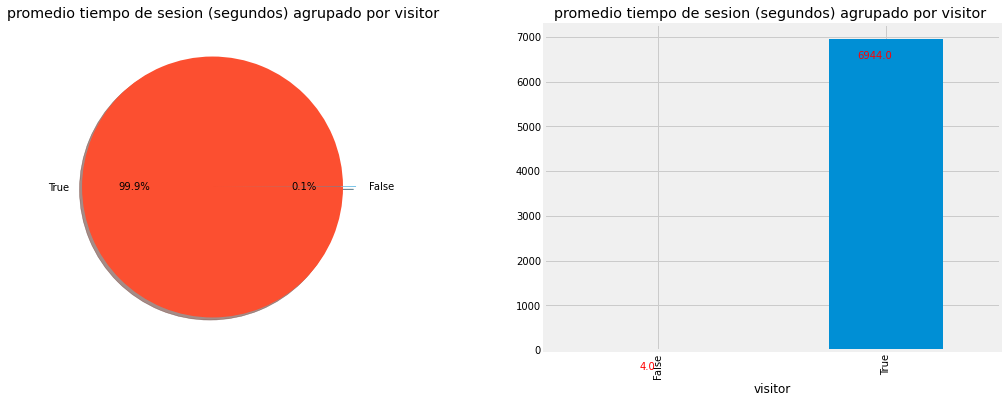

In [92]:
#cuanto tiempo en promedio dura un visitante y un no visitante 
print(e_df.groupby("visitor")["tiempodeses"].mean())
f,ax=plt.subplots(1,2,figsize=(16,6))
e_df.groupby("visitor")["tiempodeses"].mean().plot.pie(explode=[0,0.1],  autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('promedio tiempo de sesion (segundos) agrupado por visitor ')
ax[0].set_ylabel('')

# histogram de visitor
e_df.groupby("visitor")["tiempodeses"].mean().plot.bar()
ax[1].set_title('promedio tiempo de sesion (segundos) agrupado por visitor ')
#trick for display the count pretty
for p in ax[1].patches:
    ax[1].annotate(f'\n{np.round(p.get_height())}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='red', size=10)
plt.show()



hay un inmenso desvalance en los tiempos de sesion entre los vistantes y no, teniendo en promedio 4 segundos los visitantes y 6944 segungos los no visitantes

<a id="3.4"> </a>

## 3.4 Heatmaps de correlacion

una vez descrito la variable principal veamos la relacion general entre todas las variables con un correlation heatmap

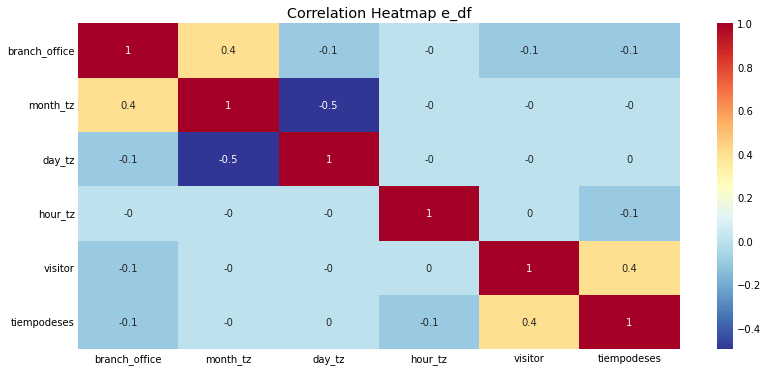

In [45]:
e_df_corrs = round(e_df.corr(),1)
plt.figure(figsize = (12, 6))
# Heatmap of correlations
sns.heatmap(e_df_corrs, cmap = plt.cm.RdYlBu_r, annot=True)
plt.title('Correlation Heatmap e_df');

a este punto surge algo interesante, y es que el tiempo de sesion tiene una correlacion (mas o menos) , significativa con visitor, y es un buen punto de partida

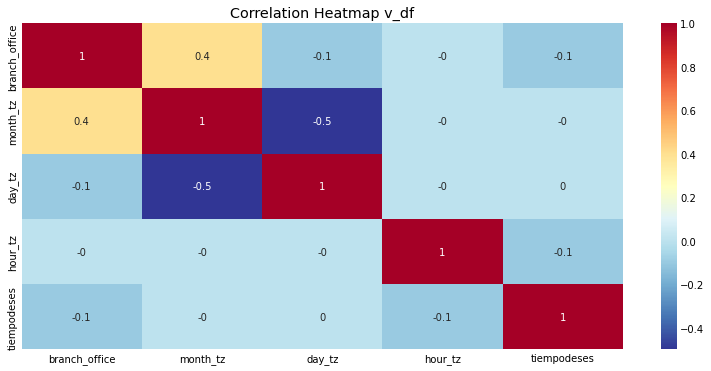

In [46]:
v_df_corrs = round(v_df.corr(),1)
plt.figure(figsize = (12, 6))
# Heatmap of correlations
sns.heatmap(v_df_corrs, cmap = plt.cm.RdYlBu_r, annot=True)
plt.title('Correlation Heatmap v_df');

solo para verificar que tienen las mismas corelaciones, hacemos lo mismo en el v_df


In [8]:
print("porcentaje de datos device_mac sin repetir (e_df):", np.round(len(np.unique(e_df["device_mac"])) / e_df.shape[0],3 ))

print("porcentaje de datos device_mac sin repetir (v_df):", np.round(len(np.unique(v_df["device_mac"])) / v_df.shape[0],3))


porcentaje de datos device_mac sin repetir (e_df): 0.502
porcentaje de datos device_mac sin repetir (v_df): 0.622


50 % de los datos son repetidos , investigare cual es el promedio en el que se repite una misma direccion mac

In [67]:
print ("cuantos son mayor a 2? :",sum(macs_dups_df > 2))


cuantos son mayor a 2? : 12874


<a id="4"></a>

# 4. Data Preparation

Ya que describimos y exploramos los datos, lo siguiente es la preparacion de los dataset para su facil manipulacion, y el formateo de algunas columnas, en este caso se construira una variable nueva (**date**) a partir las variables de de **month_tz** y **day_tz**.

- de igual manera, como se cuenta **day_of_week_tz** , **month_tz** y **day_tz** puedo deducir el año y manejar los datos mas facil, con funciones que apropiapas para el tipo de dato datetime

Las directivas que abordan en esta fase segun el **CRSIP-DM** :


- Select data
- Clean data
- Construct data
- Integrate data
- Format data


- tambien a este punto, me di cuenta de que es momento de convertir las variables de de **month_tz** y **day_tz** a datetime y comenzar a limpiar y formatear los datasets

- como tengo **day_of_week_tz** , **month_tz** y **day_tz** puedo deducir el año y manejar los datos mas facil, con sus propias funciones de datetime

In [9]:
#function to get the year based on the  **month_tz** , **day_tz**  and **day_of_week_tz**
def get_year_from_df(df):
    year_not_found = True 
    year = 2021
    while year_not_found:
        #cast dataframe tz values to datetime 
        curr_date_df = pd.to_datetime(e_df.apply(lambda x: datetime.datetime(year, x['month_tz'], x['day_tz']), axis=1))
        # si todos los day_of_week_tz son iguales a los nombres de los dias del curr_date_df
        if sum( df["day_of_week_tz"].eq( curr_date_df.dt.day_name())) == df.shape[0]:
            return year
        else:
            print("not equal on year:",year)
            year = year -1 

print("year found: ",get_year_from_df(e_df))

not equal on year: 2021
not equal on year: 2020
not equal on year: 2019
not equal on year: 2018
not equal on year: 2017
year found:  2016


ahora que ya sabemos el año en el que fueron capturados los datos fue **2016**, procedemos a convertirlos a formato date 

In [78]:
#crear la variable date con el año correcto y las demas variables tz
e_df["date"] = pd.to_datetime(e_df.apply(lambda x: datetime.datetime(2016, x['month_tz'], x['day_tz'],x["hour_tz"]), axis=1))

e_df["date"]



0        2016-11-02 00:00:00
1        2016-11-02 01:00:00
2        2016-10-30 20:00:00
3        2016-11-13 12:00:00
4        2016-11-04 19:00:00
                 ...        
249551   2016-11-30 11:00:00
249552   2016-11-30 12:00:00
249553   2016-11-30 14:00:00
249554   2016-11-30 15:00:00
249555   2016-11-30 16:00:00
Name: date, Length: 249556, dtype: datetime64[ns]

In [80]:
np.unique(e_df["date"])


676

<a id="5"></a>

# 5. Modeling

Ya que tenemos los datos en una manera conveniente

describimos y exploramos los datos, lo siguiente es la preparacion de los dataset para su facil manipulacion, y el formateo de algunas columnas, en este caso se construira una variable nueva (**date**) a partir las variables de de **month_tz** y **day_tz**.

- de igual manera, como se cuenta **day_of_week_tz** , **month_tz** y **day_tz** puedo deducir el año y manejar los datos mas facil, con funciones que apropiapas para el tipo de dato datetime


Las directivas que abordan en esta fase segun el **CRSIP-DM** :


- Select modeling techniques
- Design test
- Build model
- Assess model


<a id="6"></a>

# 6. Evaluation

Ya que tenemos nuestro modelo final, procedemos a 

describimos y exploramos los datos, lo siguiente es la preparacion de los dataset para su facil manipulacion, y el formateo de algunas columnas, en este caso se construira una variable nueva (**date**) a partir las variables de de **month_tz** y **day_tz**.

- de igual manera, como se cuenta **day_of_week_tz** , **month_tz** y **day_tz** puedo deducir el año y manejar los datos mas facil, con funciones que apropiapas para el tipo de dato datetime


Las directivas que abordan en esta fase segun el **CRSIP-DM** :


- Evaluate the results
- Review the process
- Determine the next steps

<a id="7"></a>

# 7. Deployment

una vez hecha la evaluacion y contentos con los resultados procedemos a la ultima etapa del ciclo, debido a la naturaleza del proyecto, solo reportaremos los resultados en este notebook.


- de igual manera, como se cuenta **day_of_week_tz** , **month_tz** y **day_tz** puedo deducir el año y manejar los datos mas facil, con funciones que apropiapas para el tipo de dato datetime


Las directivas que abordan en esta fase segun el **CRSIP-DM** :


- Plan, monitor and mantain
- Report and review the final results
